In [106]:
import dataframes as RAW
import cleaning as CLEAN
import pandas as pd
import numpy as np
import ast
import missingno as msno
from geopy.geocoders import Nominatim
import geopandas as gpd
import re
import pycountry_convert as pc
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

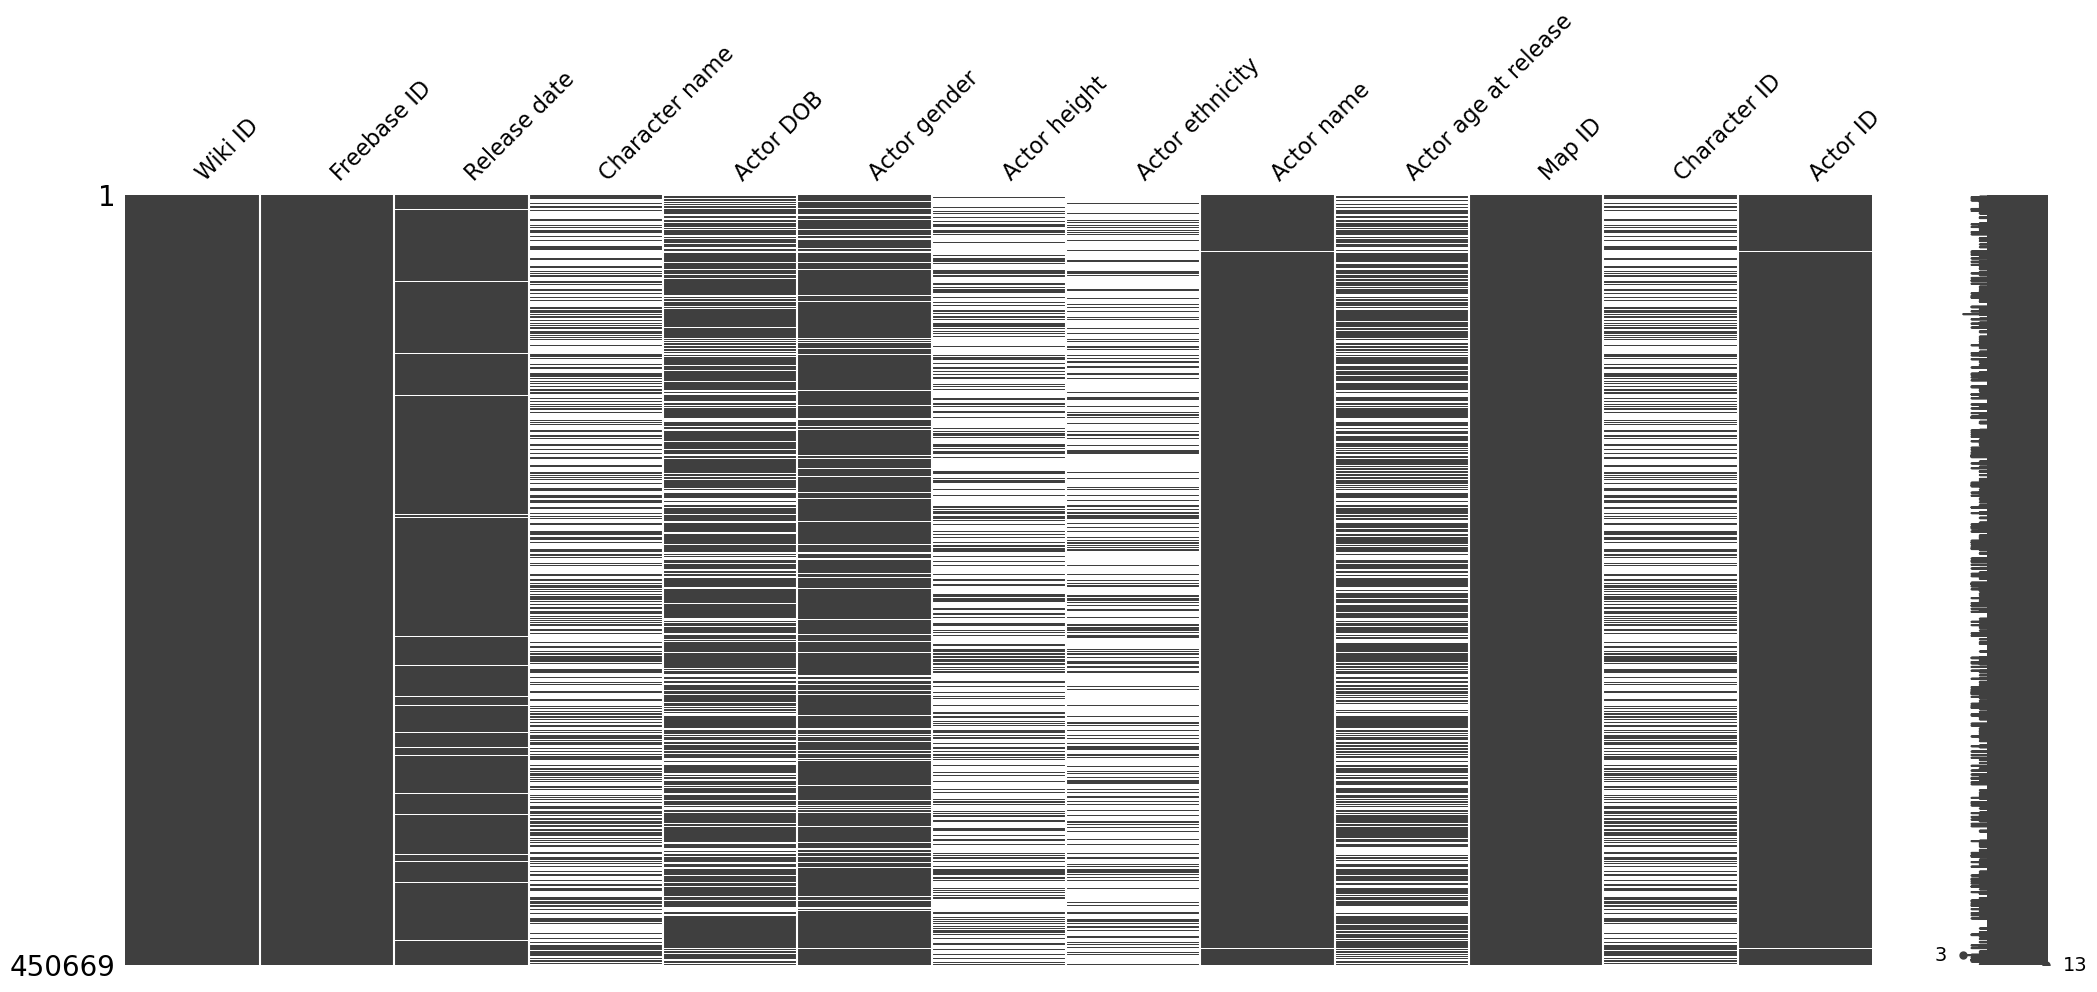

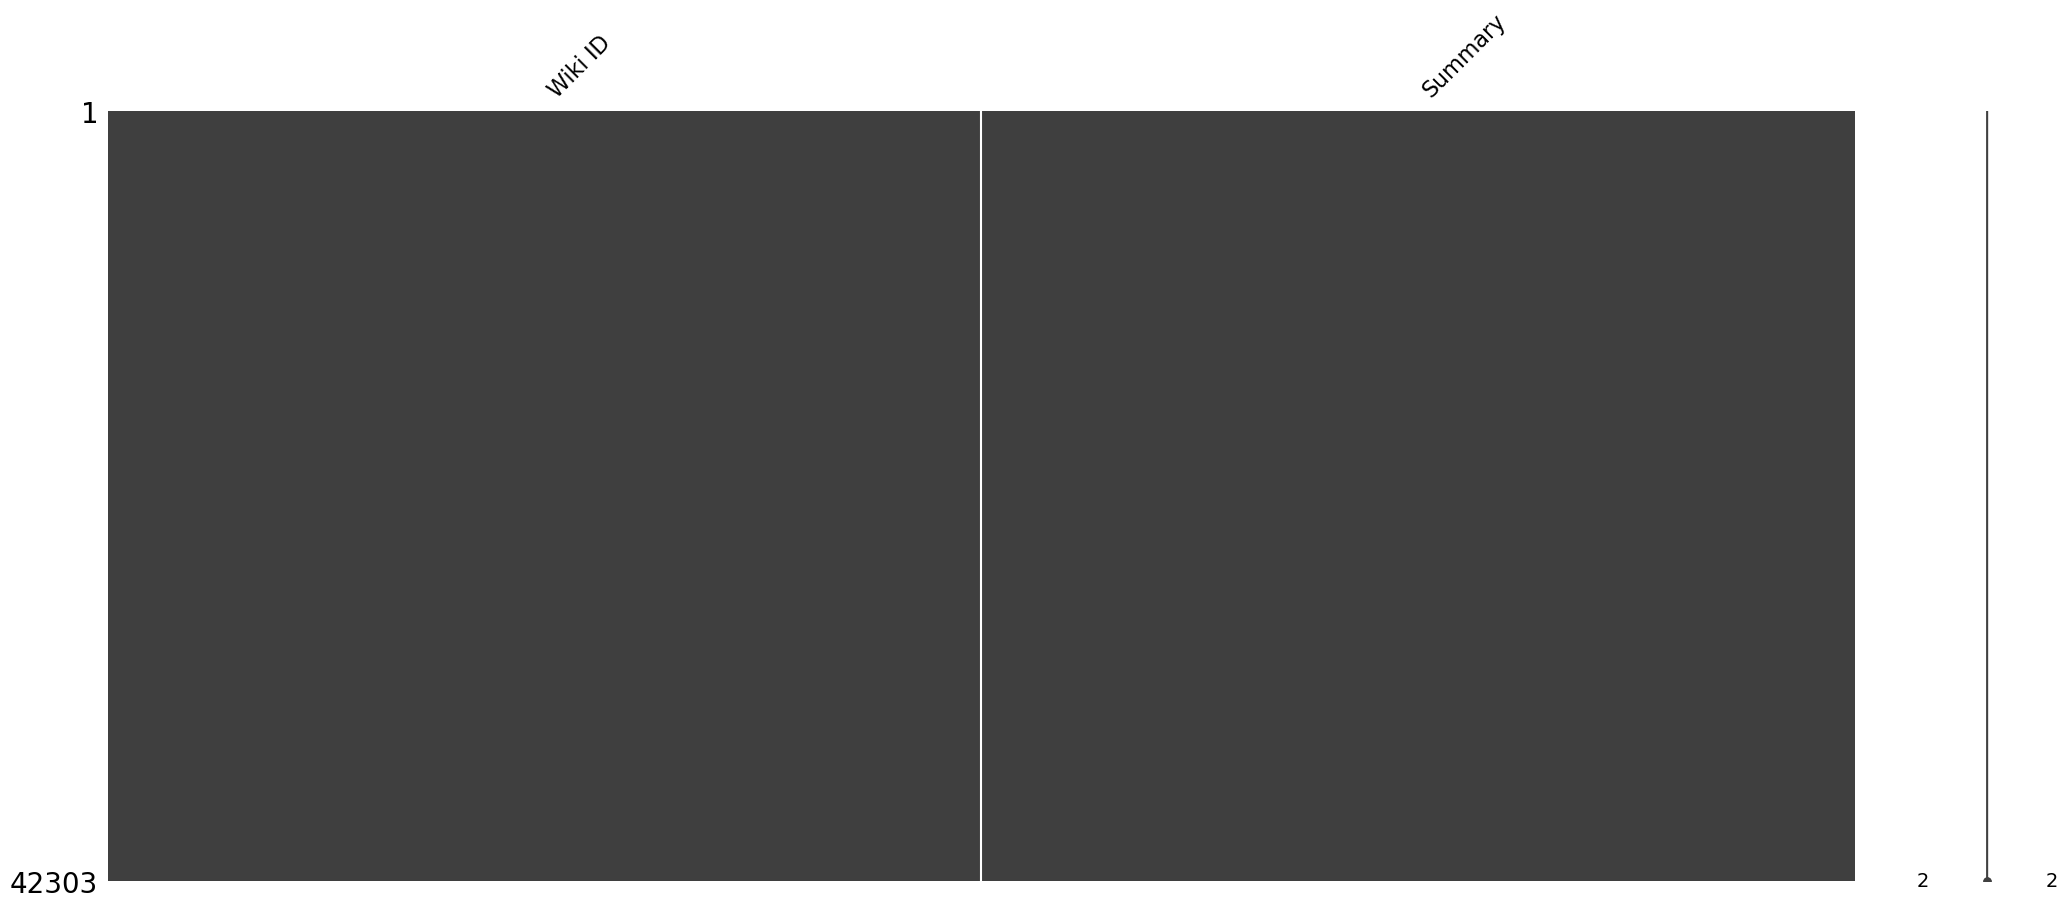

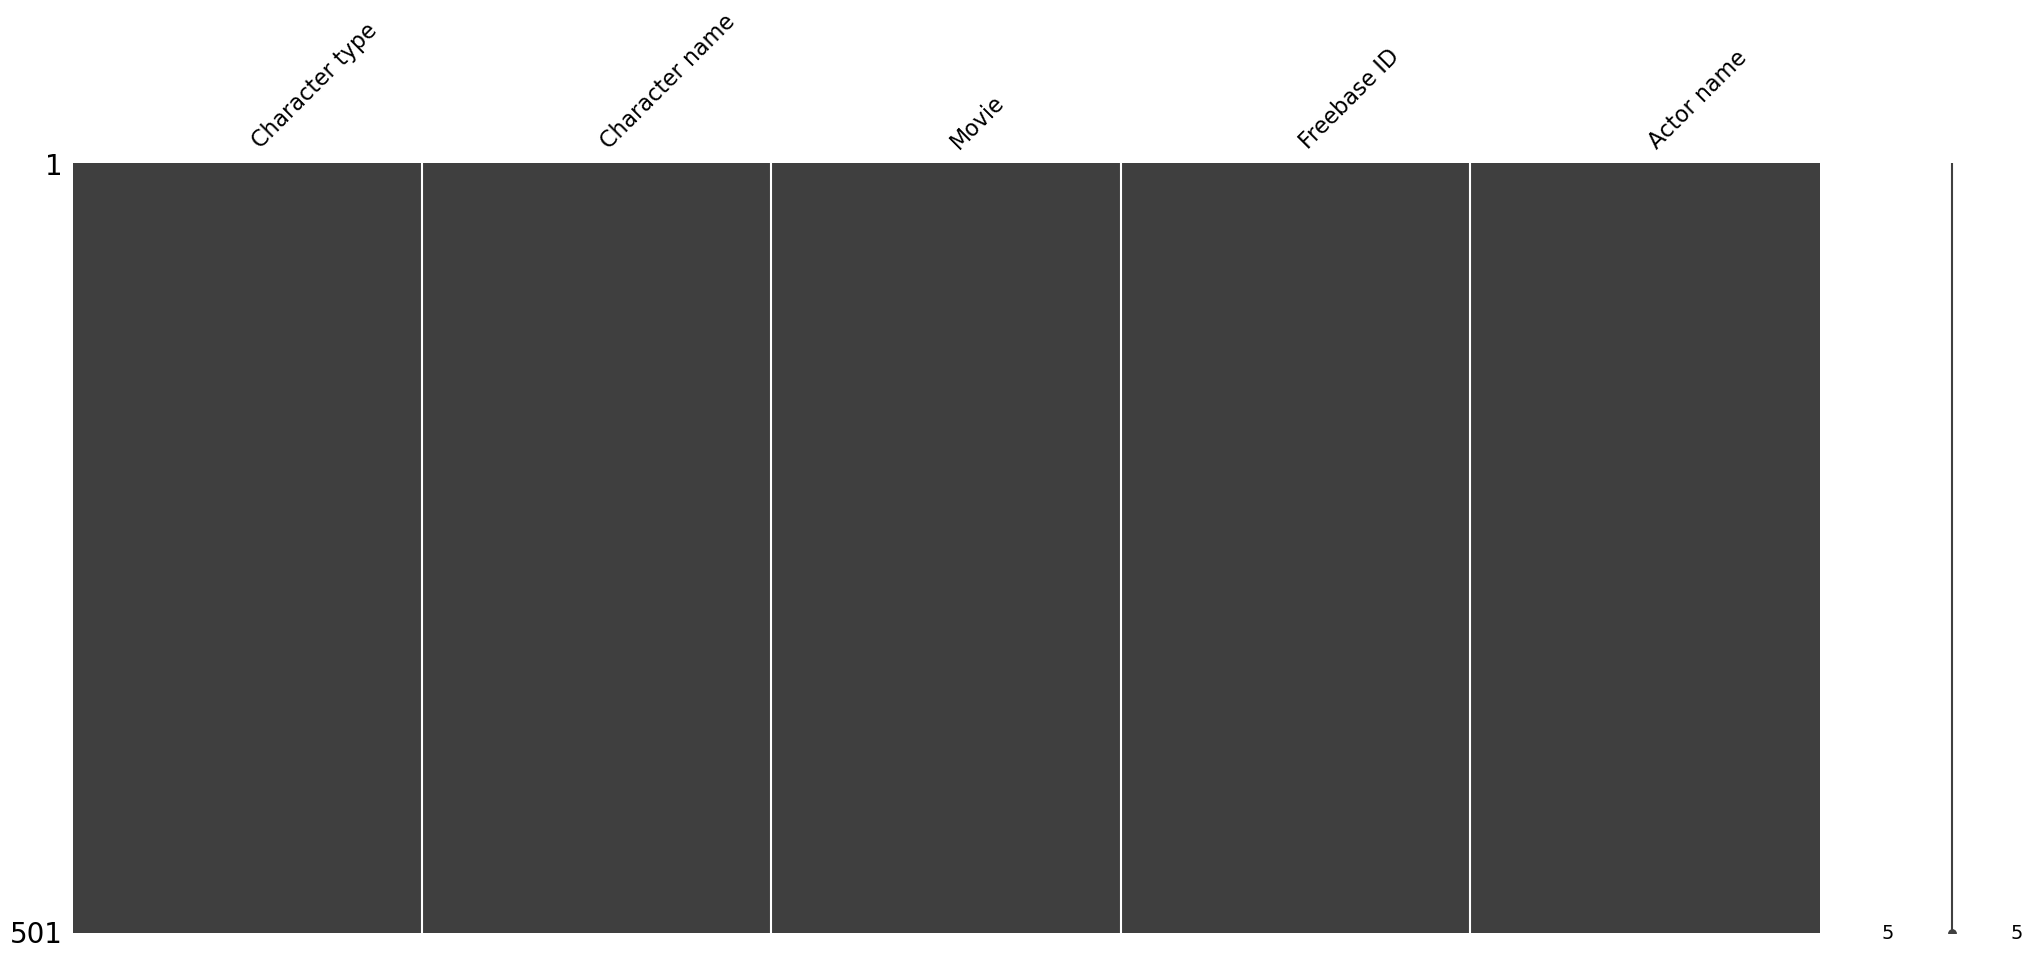

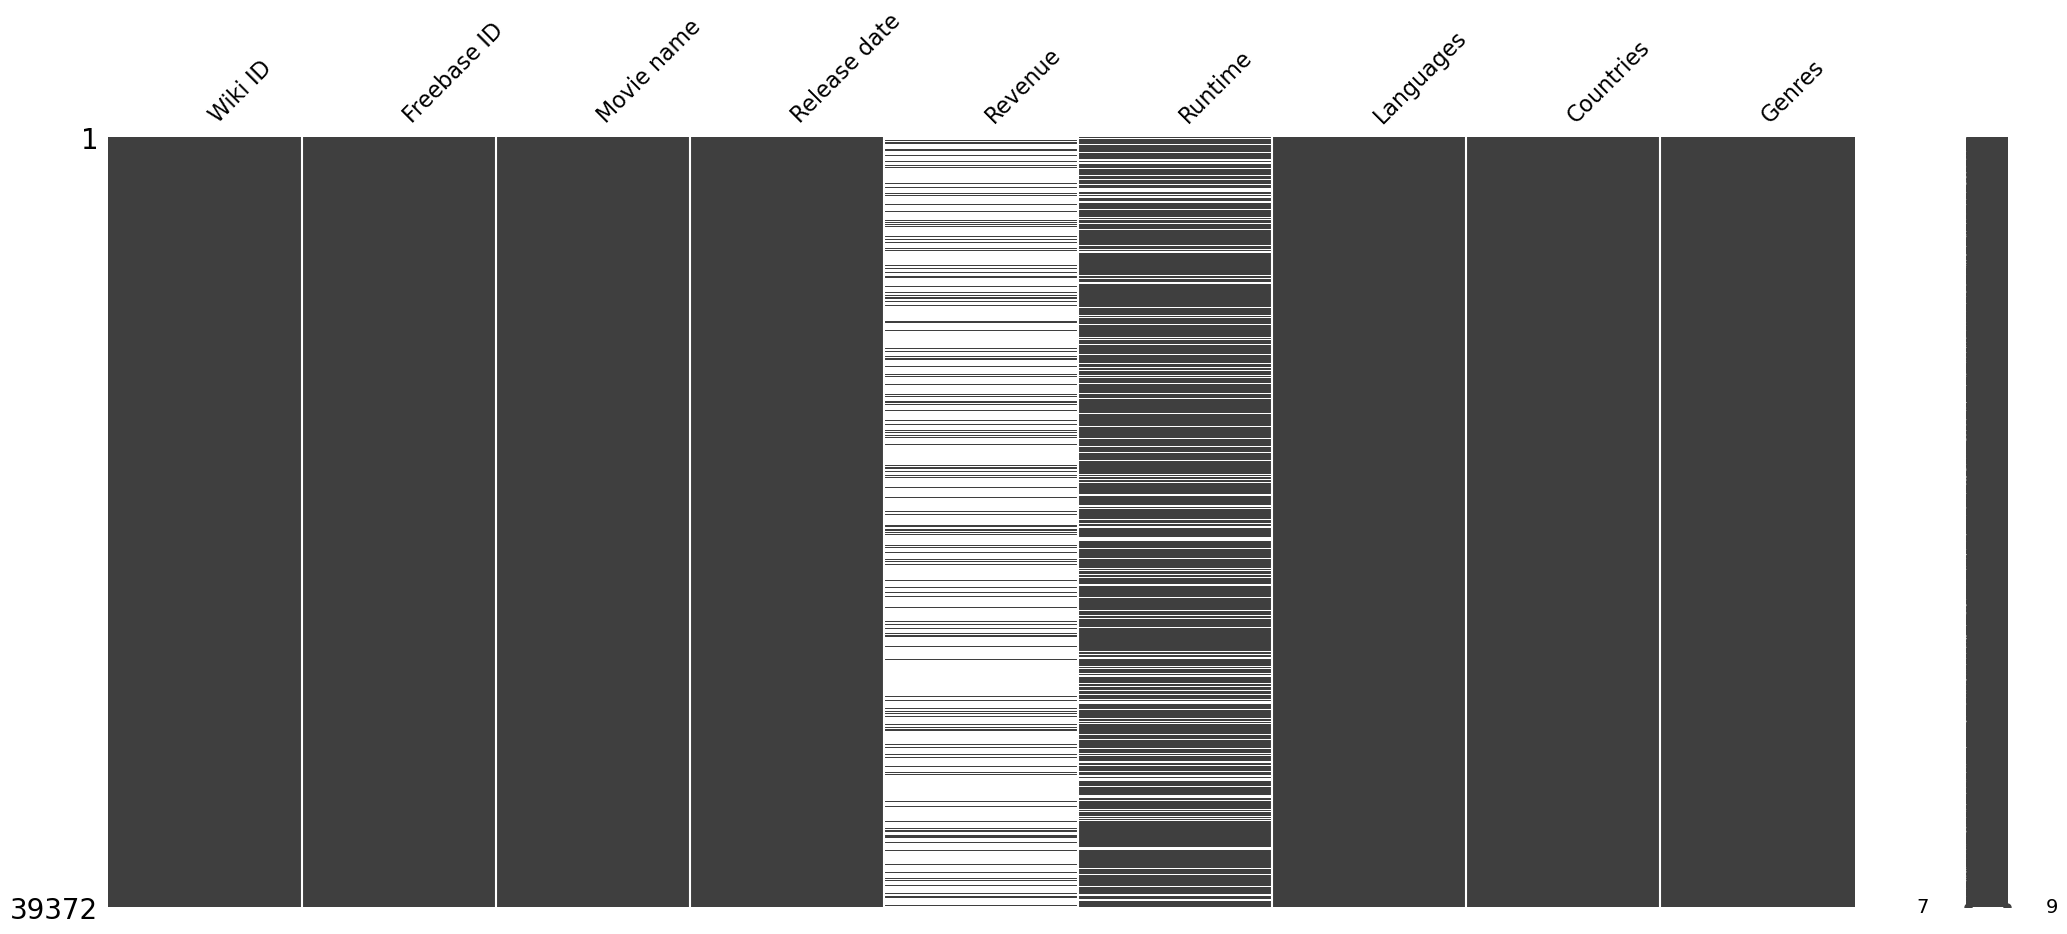

In [2]:
RAW.character_data.head()
msno.matrix(RAW.character_data)
msno.matrix(RAW.summaries)
msno.matrix(RAW.tvtropes)
msno.matrix(RAW.movie_data)

In [3]:
cleaned_movie_data = RAW.movie_data.copy()
cleaned_movie_data

,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
12,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ..."
...,...,...,...,...,...,...,...,...,...
81735,32468537,/m/0crwd9y,Shadow Boxing 2,2007-10-18,NaN,132.0,"{""/m/06b_j"": ""Russian Language"", ""/m/02h40lc"":...","{""/m/06bnz"": ""Russia""}","{""/m/01z02hx"": ""Sports"", ""/m/0lsxr"": ""Crime Fi..."
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"


In [4]:
count_braces = cleaned_movie_data[cleaned_movie_data['Countries'].astype(str).str.contains('{}', na=False)].shape[0]
print(count_braces)

2598


In [5]:
column_data_type = cleaned_movie_data['Countries'].dtype
print(column_data_type)

object


In [27]:
# On drop les lignes qui ont des braces vides = pas de pays
rows_to_drop = cleaned_movie_data[cleaned_movie_data['Countries'].astype(str).str.contains('{}', na=False)].index

# Drop the identified rows
df = cleaned_movie_data.drop(index=rows_to_drop)

#Reset indexes
df = df.reset_index()
df

,index,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres
0,0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
3,7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
4,12,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ..."
...,...,...,...,...,...,...,...,...,...,...
36769,81735,32468537,/m/0crwd9y,Shadow Boxing 2,2007-10-18,NaN,132.0,"{""/m/06b_j"": ""Russian Language"", ""/m/02h40lc"":...","{""/m/06bnz"": ""Russia""}","{""/m/01z02hx"": ""Sports"", ""/m/0lsxr"": ""Crime Fi..."
36770,81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
36771,81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
36772,81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"


In [57]:

df_new = df.copy()
#pd.DataFrame(df['Countries'])

# Utiliser une expression régulière pour extraire les noms des pays
df_new['Noms_Pays'] = df_new['Countries'].apply(lambda x: re.findall(r'": "(.*?)"', x))

# Afficher le DataFrame résultant (des doublons existent mais c'est ce qu'on veut)
df_new = df_new.explode('Noms_Pays')
df_new = df_new.reset_index()
df_new

,level_0,index,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres,Noms_Pays
0,0,0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",United States of America
1,1,1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",United States of America
2,2,5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",United States of America
3,3,7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",United States of America
4,4,12,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...
44011,36770,81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",United States of America
44012,36771,81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",Ireland
44013,36771,81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",United Kingdom
44014,36772,81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",United States of America


In [59]:
# Exemple de DataFrame avec une colonne 'Pays'
#df2 = pd.DataFrame(df_new)

# Utiliser la méthode explode pour séparer les pays
df_expanded = df_new.copy()
# Drop the 'Countries' column
df_expanded = df_expanded.drop(columns='Countries')
df_expanded['Continent']=None

# Afficher le DataFrame résultant
df_expanded

,level_0,index,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Genres,Noms_Pays,Continent
0,0,0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",United States of America,None
1,1,1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",United States of America,None
2,2,5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",United States of America,None
3,3,7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",United States of America,None
4,4,12,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",United States of America,None
...,...,...,...,...,...,...,...,...,...,...,...,...
44011,36770,81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07s9rl0"": ""Drama""}",United States of America,None
44012,36771,81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",Ireland,None
44013,36771,81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",United Kingdom,None
44014,36772,81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",United States of America,None


In [37]:
# Display unique strings and their counts in the 'Country' column
string_counts = df_expanded['Noms_Pays'].value_counts()

# Display the result
print(string_counts)

Noms_Pays
United States of America    20623
United Kingdom               3352
India                        3298
France                       2295
Japan                        1504
                            ...  
Qatar                           1
Macau                           1
German Language                 1
Uzbek SSR                       1
Haiti                           1
Name: count, Length: 137, dtype: int64


In [38]:
# Load the Natural Earth dataset
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a mapping of countries to continents
#country_to_continent = dict(zip(world['name'], world['continent']))

# Example: Displaying the mapping for a few countries
#for country in df_expanded['Noms_Pays']:
    #continent = country_to_continent.get(country, 'Unknown')
    #df_expanded.loc[country, 'Continent'] = continent
    #print(f"{country}: {continent}")

def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return None
#co = 'Soviet'
#print(country_to_continent(co))

In [60]:
for index, country in df_expanded['Noms_Pays'].items():
    if country_to_continent(country) != None :
        continent = country_to_continent(country)
        df_expanded.at[index, 'Continent'] = continent
    else : 
        df_expanded.at[index,'Continent'] = 'Unknown'
df_expanded

,level_0,index,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Genres,Noms_Pays,Continent
0,0,0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",United States of America,North America
1,1,1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",United States of America,North America
2,2,5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",United States of America,North America
3,3,7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",United States of America,North America
4,4,12,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",United States of America,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
44011,36770,81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07s9rl0"": ""Drama""}",United States of America,North America
44012,36771,81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",Ireland,Europe
44013,36771,81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",United Kingdom,Europe
44014,36772,81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",United States of America,North America


In [62]:
# Afficher la colonne 'Noms_Pays' où 'Continent' est 'Africa'
noms_pays_africa = df_expanded.loc[df_expanded['Continent'] == 'Africa', 'Noms_Pays']
print(noms_pays_africa)

# On s'assure que les pays qui ont Afrique comme continent sont bien en Afrique
nbr_countries_africa = df_expanded.loc[df_expanded['Continent'] == 'Africa', 'Noms_Pays'].value_counts()
print(nbr_countries_africa)

97            Algeria
102      South Africa
539           Morocco
600           Algeria
601           Tunisia
             ...     
42347    South Africa
42945         Morocco
43165    South Africa
43265         Algeria
43835         Algeria
Name: Noms_Pays, Length: 235, dtype: object
Noms_Pays
South Africa                        84
Egypt                               48
Morocco                             23
Algeria                             20
Tunisia                             12
Burkina Faso                         7
Mali                                 6
Democratic Republic of the Congo     6
Kenya                                5
Cameroon                             5
Senegal                              5
Nigeria                              4
Libya                                2
Zambia                               2
Ethiopia                             2
Zimbabwe                             2
Congo                                1
Guinea-Bissau                        1
Na

In [63]:
nan_count = df_expanded['Noms_Pays'].isna().sum()
unknown_count = (df_expanded['Continent'] == 'Unknown').sum()
# Print the result
print(f"Number of rows where 'pays' is NaN: {nan_count}")
print(f"Number of rows where 'continent' is unknown: {unknown_count}")
#on rajoute un plot ?

Number of rows where 'pays' is NaN: 0
Number of rows where 'continent' is unknown: 1115


In [64]:
# Filtrer les lignes où 'Continent' est 'Unknown' puis compter les valeurs de 'Noms_Pays'
unknown_countries = df_expanded.loc[df_expanded['Continent'] == 'Unknown', 'Noms_Pays'].value_counts()

# Afficher le compte et les noms des 'noms_pays' associés à 'Unknown' dans 'Continent'
print("Nombre de pays pour lesquels le continent est 'Unknown':")
print(unknown_countries)

Nombre de pays pour lesquels le continent est 'Unknown':
Noms_Pays
West Germany                                349
Czechoslovakia                              164
Yugoslavia                                  156
Soviet Union                                144
England                                      90
German Democratic Republic                   57
Weimar Republic                              40
Korea                                        22
Scotland                                     19
Burma                                        14
Nazi Germany                                  8
Kingdom of Great Britain                      8
Republic of Macedonia                         7
Socialist Federal Republic of Yugoslavia      7
Serbia and Montenegro                         6
Palestinian territories                       6
Mandatory Palestine                           5
Federal Republic of Yugoslavia                4
Wales                                         3
Soviet occupation zon

In [83]:
#Pour garder seulement les pays qui ont minimum 100 films

country_counts = df_expanded['Noms_Pays'].value_counts()

# Sélectionner les pays qui apparaissent au moins 100 fois
pays_plus_100 = country_counts[country_counts >= 100].index.tolist()

# Filtrer les lignes de df_expanded où 'Noms_pays' est dans pays_plus_100
df_filtered = df_expanded[df_expanded['Noms_Pays'].isin(pays_plus_100) | (df_expanded['Continent'] == 'Africa')]

# Afficher le DataFrame filtré
#print(df_filtered)
country_filtered_check = df_filtered['Noms_Pays'].value_counts()
print(country_filtered_check)

Noms_Pays
United States of America            20623
United Kingdom                       3352
India                                3298
France                               2295
Japan                                1504
Germany                              1430
Italy                                1344
Canada                               1157
South Korea                           695
Spain                                 539
Australia                             532
Denmark                               474
Sweden                                442
Hong Kong                             437
Netherlands                           424
West Germany                          349
Argentina                             307
China                                 241
Mexico                                210
Norway                                197
Poland                                181
Belgium                               165
Czechoslovakia                        164
Philippines             

In [84]:
#Pour garder seulement les pays qui ont minimum 100 films

#country_counts = df_expanded['Noms_Pays'].value_counts()

# Sélectionner les pays qui apparaissent au moins 100 fois
#country_plus_100 = country_counts[country_counts >= 100].index.tolist()

# Filtrer les lignes de df_expanded où 'Noms_pays' est dans pays_plus_100
#df_filtered = df_expanded[df_expanded['Continent'].isin(continent_plus_100)] or df_expanded['Continent'] == 'Africa'

# Afficher le DataFrame filtré
#print(df_filtered)
#continent_filtered_check = df_filtered['Continent'].value_counts()
#print(continent_filtered_check)

In [85]:
#Affichage des pays de df_filtered pour lequel le continent est Unknown:

unknown_continent_counts = df_filtered[df_filtered['Continent'] == 'Unknown']['Noms_Pays'].value_counts()

# Afficher les pays ayant 'Unknown' dans leur colonne 'Continent' et le nombre d'occurrences
print("Pays avec 'Unknown' dans leur colonne 'Continent':")
print(unknown_continent_counts)

african_countries_counts = df_filtered[df_filtered['Continent'] == 'Africa']['Noms_Pays'].value_counts()


Pays avec 'Unknown' dans leur colonne 'Continent':
Noms_Pays
West Germany      349
Czechoslovakia    164
Yugoslavia        156
Soviet Union      144
Name: count, dtype: int64


In [86]:
# Liste des pays pour lesquels vous voulez attribuer manuellement un continent
pays_a_modifier = ['Hong Kong', 'West Germany', 'Czechoslovakia', 'Soviet Union', 'Yugoslavia']

# Dictionnaire des correspondances entre pays et continents
correspondances_continents = {
    'Hong Kong': 'Asia',
    'West Germany': 'Europe',
    'Czechoslovakia': 'Europe',
    'Soviet Union': 'Europe',
    'Yugoslavia': 'Europe'
}

# Attribuer manuellement les continents à ces pays dans le DataFrame
for pays, continent in correspondances_continents.items():
    if pays in pays_a_modifier:
        df_filtered.loc[df_filtered['Noms_Pays'] == pays, 'Continent'] = continent


In [87]:
# On s'assure que tous les pays ont un continent
#Affichage des pays de df_filtered pour lequel le continent est Unknown:

unknown_continent_counts = df_filtered[df_filtered['Continent'] == 'Unknown']['Noms_Pays'].sum()

# Afficher les pays ayant 'Unknown' dans leur colonne 'Continent' et le nombre d'occurrences
print("Pays avec 'Unknown' dans leur colonne 'Continent':")
print(unknown_continent_counts)

Pays avec 'Unknown' dans leur colonne 'Continent':
0


In [88]:
#Je droppe mnt tous les pays qui ont un continent unknown
# Filtrer les lignes où 'Continent' est 'Unknown' et supprimer ces lignes
df_filtered = df_filtered[df_filtered['Continent'] != 'Unknown']

# Afficher le DataFrame après la suppression
df_filtered

,level_0,index,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Genres,Noms_Pays,Continent
0,0,0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",United States of America,North America
1,1,1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",United States of America,North America
2,2,5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",United States of America,North America
3,3,7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",United States of America,North America
4,4,12,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",United States of America,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
44011,36770,81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07s9rl0"": ""Drama""}",United States of America,North America
44012,36771,81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",Ireland,Europe
44013,36771,81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",United Kingdom,Europe
44014,36772,81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",United States of America,North America


In [89]:
grouped = df_filtered.groupby('Continent')

# Sauvegarde des données pour chaque continent dans des fichiers CSV séparés
for continent, group_data in grouped:
    file_name = f"{continent}_data.csv"
    group_data.to_csv(file_name, index=False)
    print(f"Données pour {continent} sauvegardées dans '{file_name}'")

Données pour Africa sauvegardées dans 'Africa_data.csv'
Données pour Asia sauvegardées dans 'Asia_data.csv'
Données pour Europe sauvegardées dans 'Europe_data.csv'
Données pour North America sauvegardées dans 'North America_data.csv'
Données pour Oceania sauvegardées dans 'Oceania_data.csv'
Données pour South America sauvegardées dans 'South America_data.csv'


In [114]:
# Create a subtable with only Freebase ID and countries

id_country = df_filtered.copy()
id_country = id_country[['Freebase ID', 'Continent']]
#id_country

# We group movies with the same Freebase ID
grouped_continent = id_country.groupby('Freebase ID')['Continent'].agg(list).reset_index()
#grouped_countries['Noms_Pays'].value_counts()

continent_pairs_count = {}

# Iterate over rows and update the dictionary
for _, row in grouped_continent.iterrows():
    continent = row['Continent']
    # Use combinations to get all unique pairs of continent within each 'Freebase ID'
    pairs = list(combinations(continent, 2))
    for pair in pairs:
        continent_pairs_count[pair] = continent_pairs_count.get(pair, 0) + 1
        

# Convert the dictionary to a DataFrame
count_df = pd.DataFrame.from_dict(continent_pairs_count, orient='index', columns=['Count']).reset_index()
array = [np.array([elm[0], elm[1]]) for elm in count_df['index']]
count_df['Continent_1'] = [elm[0] for elm in count_df['index']]
count_df['Continent_2'] = [elm[1] for elm in count_df['index']]

# Creating the pivot table
pivot_table = pd.pivot_table(count_df, values='Count', index='Continent_1', columns='Continent_2', fill_value=0)


In [121]:
grouped_countries['Noms_Pays'].value_counts()

Noms_Pays
[United States of America]                                       18113
[India]                                                           3209
[United Kingdom]                                                  1903
[Japan]                                                           1276
[France]                                                           898
                                                                 ...  
[Switzerland, Italy, Germany, United Kingdom, Netherlands]           1
[Switzerland, Austria, Italy, Germany]                               1
[China, Germany]                                                     1
[United States of America, South Africa, Canada, New Zealand]        1
[France, Italy, United Kingdom, China]                               1
Name: count, Length: 925, dtype: int64

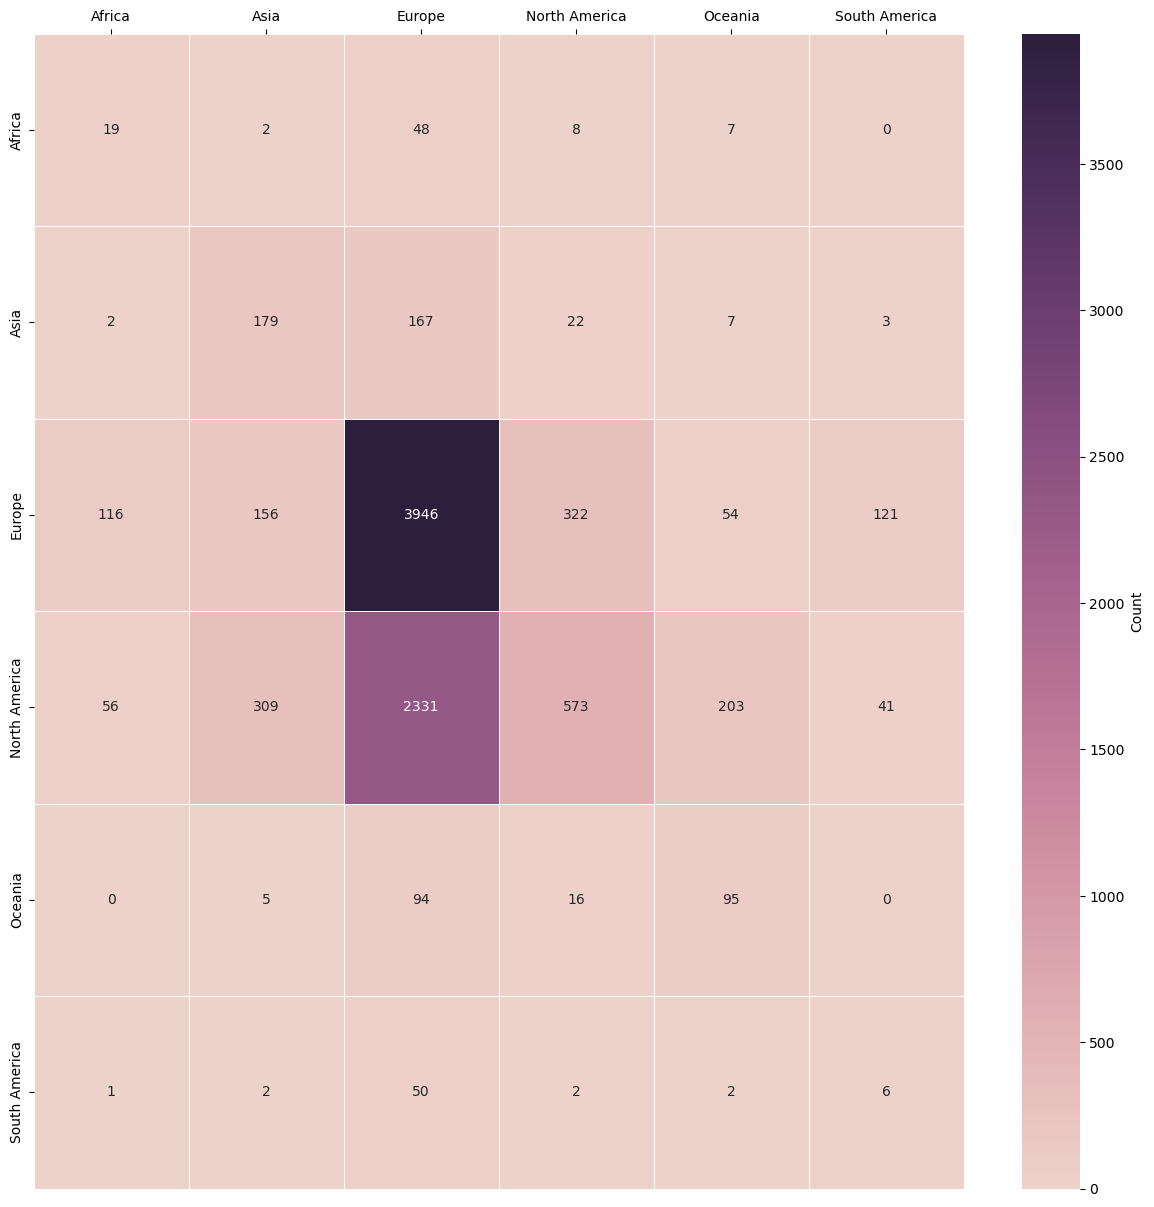

In [120]:
# Heatmap
plt.figure(figsize=(15, 15))
ax = sns.heatmap(pivot_table, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), linewidth= .5, fmt='g', cbar_kws={'label': 'Count'})
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()